In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
sc = pd.read_csv("/Users/jeffreyverdiere/Desktop/salles_curan.txt")


In [10]:
# Constants
CAPEX = 82000000
capacity = 87
OPEX = 40000*capacity
rate = 0.06 # Interest rate
lifetime = 25
tariff = 82 # Feed-in tariff
premium = 75 # Feed-in premium

In [12]:
# Compute average annual production and average capacity factor
prod = np.sum(sc['output'])/6
cap = np.mean(sc['output'])/capacity
print('Production annuelle: ',prod,'; Capacity factor: ',cap)

Production annuelle:  149488.91799999998 ; Capacity factor:  0.19596982496434562


In [13]:
# Compute the LCOE
LCOE = (CAPEX+OPEX*np.sum(np.power(1+rate,-np.linspace(1,25,25))))/(prod*np.sum(np.power(1+rate,-np.linspace(1,25,25))))
print('LCOE: ', LCOE)

LCOE:  66.18946090309163


In [14]:
# Compute the hourly revenue based on
# - Market price
# - Feed-in tariff of 82 Eur / MWh
# - Feed-in premium with base rate of 75 Eur / MWh
sc['market']=sc['output']*sc['price']
sc['tariff']=sc['output']*tariff
sc['premium']=sc['output']*tariff


In [15]:
# Compute the daily price, production and revenues (3 methods)
dates = pd.unique(sc['date1'])
daily = np.zeros((5,len(dates)))
for i in range(len(dates)):
    d = dates[i]
    ext = sc[sc['date1']==d]
    daily[0,i] = np.mean(ext['price'])
    daily[1,i] = np.sum(ext['output'])
    daily[2,i] = np.sum(ext['market'])
    daily[3,i] = np.sum(ext['tariff'])
    daily[4,i] = np.sum(ext['premium'])

In [16]:
daily

array([[           nan,            nan,            nan, ...,
           49.22708333,    50.27458333,    49.23291667],
       [  123.658     ,   281.219     ,   438.781     , ...,
          557.606     ,   430.434     ,   297.843     ],
       [    0.        ,     0.        ,     0.        , ...,
        25502.88469   , 21335.02125   , 14097.42384   ],
       [10139.956     , 23059.958     , 35980.042     , ...,
        45723.692     , 35295.588     , 24423.126     ],
       [10139.956     , 23059.958     , 35980.042     , ...,
        45723.692     , 35295.588     , 24423.126     ]])

Text(0.5, 1.0, 'Daily average market price')

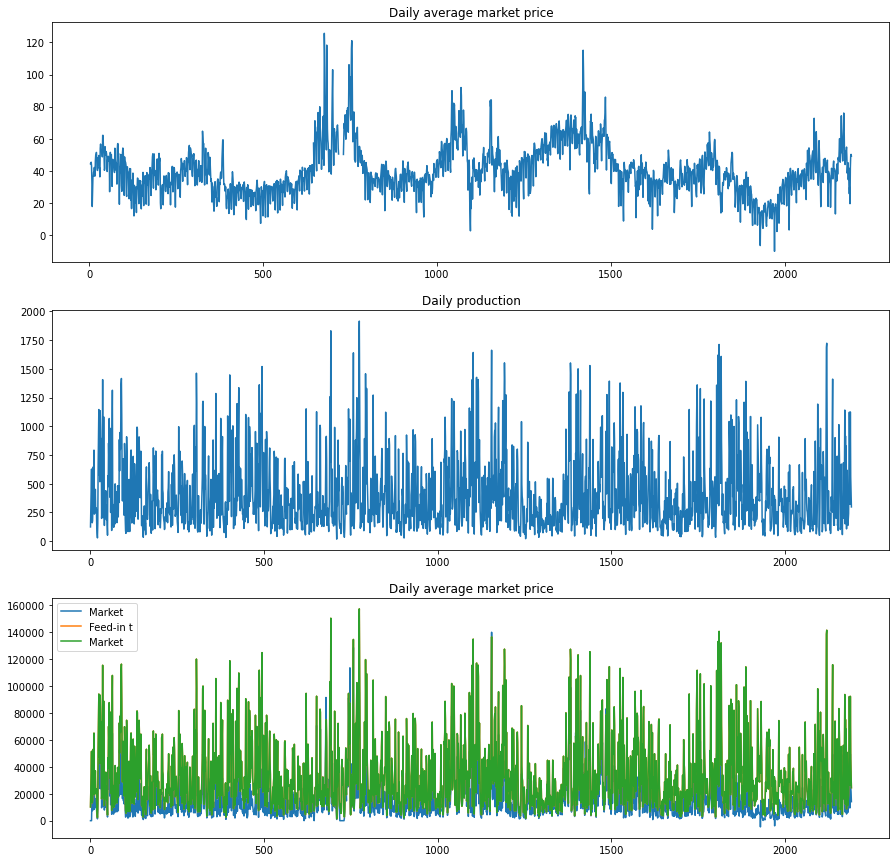

In [17]:
# Plot the daliy price, production and revenue (3 methods)
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(daily[0,:])
plt.title('Daily average market price')
plt.subplot(3,1,2)
plt.plot(daily[1,:])
plt.title('Daily production')
plt.subplot(3,1,3)
plt.plot(daily[2,:],label='Market')
plt.plot(daily[3,:],label='Feed-in t')
plt.plot(daily[4,:],label='Market')
plt.legend()
plt.title('Daily average market price')



In [18]:
# Plot the daily revenue distribution
print('Mean daily revenue, market',np.mean(daily[2,:]))
print('Mean daily revenue, tariff',np.mean(daily[3,:]))
print('Mean daily revenue, premium',np.mean(daily[4,:]))

Mean daily revenue, market 16191.281452846713
Mean daily revenue, tariff 33553.16955109489
Mean daily revenue, premium 33553.16955109489


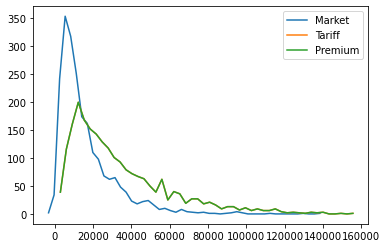

In [20]:
hist_market = np.histogram(daily[2,:],bins=50)
hist_tariff = np.histogram(daily[3,:],bins=50)
hist_premium = np.histogram(daily[4,:],bins=50)
plt.plot((hist_market[1][:-1]+hist_market[1][1:])/2, hist_market[0],label='Market')
plt.plot((hist_tariff[1][:-1]+hist_tariff[1][1:])/2, hist_tariff[0],label='Tariff')
plt.plot((hist_premium[1][:-1]+hist_premium[1][1:])/2, hist_premium[0],label='Premium')
plt.legend()

On peut conclure que la subvention de 82 euros par MW/H couvre le LCOE. Le taux d'intérêt est un paramètre très important dans ce cas. On peut essayer de faire une étude de sensibilité sur ces paramètres. Plus le financement est cher plus il faut un prix élevé (très naturel).

En baissant le taux d'intérêt du LCOE est plus faible.